In [1]:
import pandas as pd
import numpy as np
import unidecode
from sklearn import linear_model

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 14,8


In [2]:
df = pd.read_excel("./../dados/Base WDI - Séries listadas no programa - 1991 a 2019  v01dez2020.xlsx",sheet_name = "Data" )

In [3]:
df.head(2)

,Country Name,Country Code,Series Name,Series Code,1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,..,..,..,..,..,..,...,23.7437,24.3909,22.8107,22.137,20.6343,21.0811,20.4665,20.2528,21.1344,..
1,Afghanistan,AFG,Chemicals (% of value added in manufacturing),NV.MNF.CHEM.ZS.UN,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [4]:
df_alemanha = df.loc[df["Country Name"] == "Germany"]
df_alemanha = df_alemanha.drop(["Country Name","Country Code","Series Code"], axis=1)
df_alemanha = df_alemanha.set_index("Series Name", drop=True)

In [5]:
df_alemanha = df_alemanha.T

In [6]:
print("\nColunas no dataset\n")
[print(coluna) for coluna in df_alemanha.columns]
print("\n")

colunas_interesse_1 = ["Population, total"]

colunas_interesse_2 = ["GDP growth (annual %)",
                       "GNI, PPP (current international $)",
                       "GNI per capita, PPP (current international $)"]

colunas_interesse_3 = ["Agriculture, forestry, and fishing, value added (% of GDP)",
                       "Chemicals (% of value added in manufacturing)",
                       "Industry (including construction), value added (% of GDP)",
                       "Services, value added (% of GDP)",
                       "Manufacturing, value added (% of GDP)",
                       "Food, beverages and tobacco (% of value added in manufacturing)",
                       "Textiles and clothing (% of value added in manufacturing)", 
                       "Machinery and transport equipment (% of value added in manufacturing)",
                       "Other manufacturing (% of value added in manufacturing)",
                       "GDP per capita growth (annual %)",
                       "GDP per person employed (constant 2017 PPP $)"]

colunas_interesse_4 = ["Inflation, consumer prices (annual %)",
                       "Unemployment, total (% of total labor force) (modeled ILO estimate)"]

colunas_interesse_5 = ["Revenue, excluding grants (% of GDP)",
                       "Expense (% of GDP)",
                       "Net lending (+) / net borrowing (-) (% of GDP)"]



Colunas no dataset

Agriculture, forestry, and fishing, value added (% of GDP)
Chemicals (% of value added in manufacturing)
Central government debt, total (% of GDP)
Deposit interest rate (%)
Expense (% of GDP)
Food, beverages and tobacco (% of value added in manufacturing)
GDP growth (annual %)
GNI, PPP (current international $)
GNI per capita, PPP (current international $)
GDP per capita growth (annual %)
GDP per person employed (constant 2017 PPP $)
Industry (including construction), value added (% of GDP)
Inflation, consumer prices (annual %)
Lending interest rate (%)
Manufacturing, value added (% of GDP)
Machinery and transport equipment (% of value added in manufacturing)
Net lending (+) / net borrowing (-) (% of GDP)
Other manufacturing (% of value added in manufacturing)
Population, female
Population, female (% of total population)
Population, male
Population, male (% of total population)
Population, total
Revenue, excluding grants (% of GDP)
Risk premium on lending (lending 

In [7]:
df_interesse = df_alemanha[colunas_interesse_1 + 
                           colunas_interesse_2 + 
                           colunas_interesse_3 + 
                           colunas_interesse_4 + 
                           colunas_interesse_5].iloc[-12:-1:]

df_interesse

Series Name,"Population, total",GDP growth (annual %),"GNI, PPP (current international $)","GNI per capita, PPP (current international $)","Agriculture, forestry, and fishing, value added (% of GDP)",Chemicals (% of value added in manufacturing),"Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)","Manufacturing, value added (% of GDP)","Food, beverages and tobacco (% of value added in manufacturing)",Textiles and clothing (% of value added in manufacturing),Machinery and transport equipment (% of value added in manufacturing),Other manufacturing (% of value added in manufacturing),GDP per capita growth (annual %),GDP per person employed (constant 2017 PPP $),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Revenue, excluding grants (% of GDP)",Expense (% of GDP),Net lending (+) / net borrowing (-) (% of GDP)
2009 [YR2009],81902307,-5.69715,3.08626e+12,37680,0.695334,11.8108,24.7358,64.2286,17.6834,8.91299,1.52851,37.074,40.6737,-5.4579,95185.7,0.312738,7.742,28.7876,31.0461,-2.18217
2010 [YR2010],81776930,4.17897,3.2515e+12,39760,0.803697,11.4278,26.8489,62.2587,19.6952,7.77523,1.42621,39.8559,39.5148,4.33869,98195.3,1.10381,6.966,27.9904,31.3667,-3.26287
2011 [YR2011],80274983,3.92413,3.50247e+12,43630,0.910022,10.8816,27.069,61.7944,20.233,7.33136,1.448,41.3261,39.013,5.86856,101653,2.07517,5.824,28.3229,28.875,-0.450222
2012 [YR2012],80425823,0.419551,3.5709e+12,44400,0.847919,10.5191,27.284,61.6867,20.1564,7.49946,1.38681,41.8858,38.7089,0.231213,101412,2.00849,5.379,28.5544,28.4939,0.169671
2013 [YR2013],80645605,0.428243,3.71258e+12,46040,0.942643,10.4389,26.7826,62.1918,19.9252,7.5922,1.36114,42.142,38.4657,0.154548,100807,1.50472,5.231,28.5478,28.546,0.155726
2014 [YR2014],80982500,2.22569,3.88339e+12,47950,0.904548,10.3807,27.011,62.1086,20.2244,7.31486,1.38474,43.3849,37.5347,1.80042,102249,0.906798,4.981,28.5003,28.0522,0.644866
2015 [YR2015],81686611,1.73975,3.98377e+12,48770,0.68378,10.3838,27.0646,62.2141,20.3772,7.49108,1.26207,44.1346,36.7284,0.862788,102974,0.514421,4.624,28.391,27.9095,0.647246
2016 [YR2016],82348669,2.23,4.26642e+12,51810,0.698318,10.4619,27.4967,61.8405,20.7437,7.56214,1.23593,44.4831,36.2569,1.4081,103593,0.491749,4.122,28.3526,27.8617,0.705561
2017 [YR2017],82657002,2.46503,4.49392e+12,54370,0.831436,10.2885,27.4421,61.783,20.5621,7.48472,1.23883,44.4936,36.4943,2.08281,105160,1.5095,3.746,28.6889,28.221,0.58709
2018 [YR2018],82905782,1.52745,4.64107e+12,55980,0.768635,10.2885,27.4617,61.8407,20.4036,7.48472,1.23883,44.4936,36.4943,1.22279,105705,1.73217,3.384,29.0596,28.0657,1.07464


In [8]:
anos_tot = [int(ano_tot[:4]) for ano_tot in list(df_alemanha.index)]

df_alemanha.index = anos_tot

anos = [int(ano[:4]) for ano in list(df_interesse.index)]




df_interesse.index=anos

df_interesse.replace("..", np.NaN, inplace = True)

df_interesse = pd.DataFrame(df_interesse, dtype=float)

In [9]:
df_interesse.head(2)

Series Name,"Population, total",GDP growth (annual %),"GNI, PPP (current international $)","GNI per capita, PPP (current international $)","Agriculture, forestry, and fishing, value added (% of GDP)",Chemicals (% of value added in manufacturing),"Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)","Manufacturing, value added (% of GDP)","Food, beverages and tobacco (% of value added in manufacturing)",Textiles and clothing (% of value added in manufacturing),Machinery and transport equipment (% of value added in manufacturing),Other manufacturing (% of value added in manufacturing),GDP per capita growth (annual %),GDP per person employed (constant 2017 PPP $),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Revenue, excluding grants (% of GDP)",Expense (% of GDP),Net lending (+) / net borrowing (-) (% of GDP)
2009,81902307.0,-5.697152,3.086257e+12,37680.0,0.695334,11.810820,24.735805,64.228553,17.683350,8.912990,1.528512,37.073986,40.673692,-5.457901,95185.714095,0.312738,7.742,28.787642,31.046068,-2.182171
2010,81776930.0,4.178969,3.251502e+12,39760.0,0.803697,11.427787,26.848893,62.258657,19.695211,7.775234,1.426211,39.855926,39.514843,4.338692,98195.346832,1.103809,6.966,27.990446,31.366713,-3.262869


# 1 - Caracterização

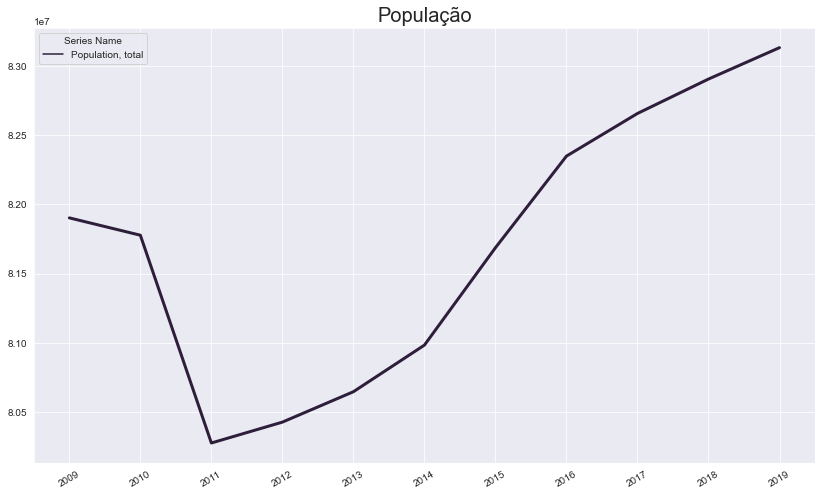

In [10]:
sns.set_style("darkgrid")
sns.set_palette("mako")

plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse[colunas_interesse_1],
                     linewidth=3,
                     legend=True)

graph.set_title('População', fontsize=20)

plt.savefig('./../graficos/populacao.png')

plt.show()

# 2 - Produto e Renda

### Crescimento percentual real do PIB por ano

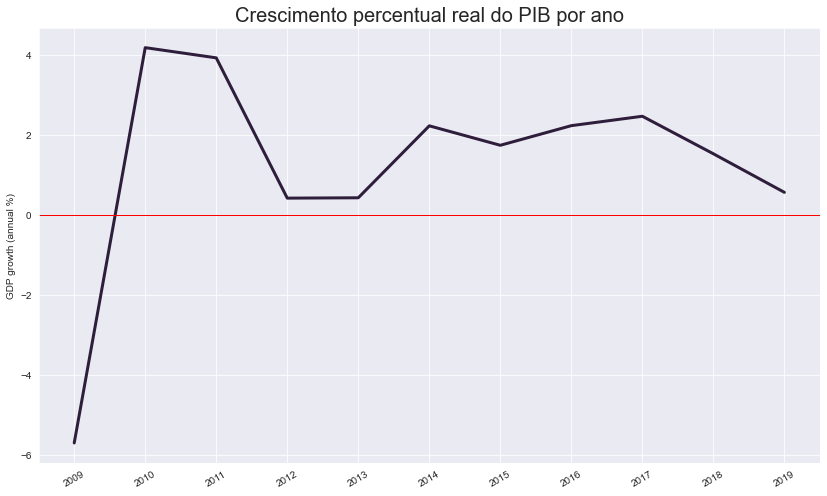

In [11]:
plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse,
                     x=df_interesse.index,
                     y="GDP growth (annual %)", 
                     linewidth=3)

graph.axhline(0, color = "r",linewidth=1)

graph.set_title('Crescimento percentual real do PIB por ano', fontsize=20)

plt.savefig('./../graficos/cresc_pib_real.png')

plt.show()

### Analise RNB

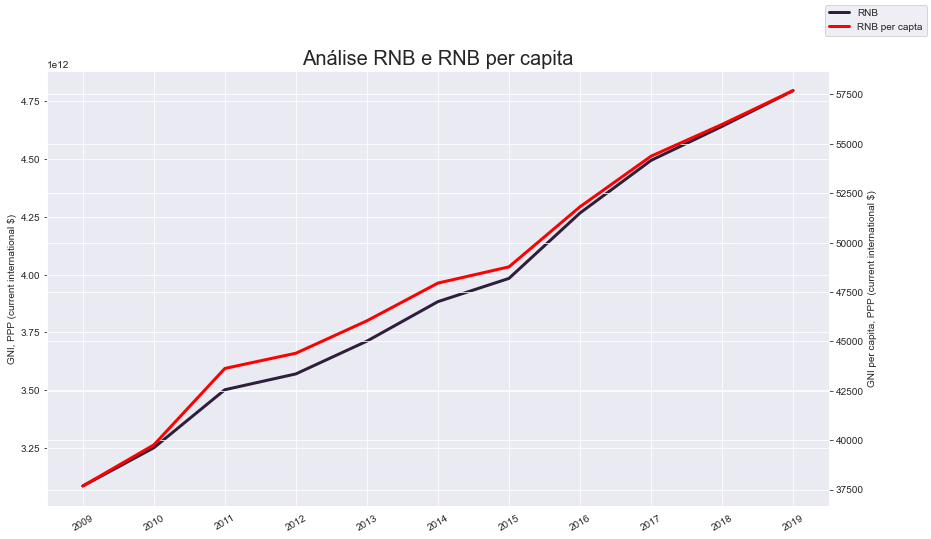

In [12]:
plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse["GNI, PPP (current international $)"],
                     linewidth=3,
                     label="RNB",
                     legend=False)

ax2 = graph.twinx()

sns.lineplot(data=df_interesse["GNI per capita, PPP (current international $)"],
             linewidth=3,
             label="RNB per capta", 
             color = "red",
             legend=False)



graph.figure.legend()

graph.set_title('Análise RNB e RNB per capita', fontsize=20)

plt.savefig('./../graficos/analise_rnb.png')

plt.show()

# 3 - Composicao setorial da economia e produtividade

Parcela da agricultura no PIB               -- Parcela da agricultura no PIB 

Parcela da agricultura no PIB               -- Industry, value added (% of GDP)

Parcela de serviços no PIB                  -- Services, value added (% of GDP)

Parcela da ind. manufatureira no PIB        -- Manufacturing, value added (% of GDP) 

Parcela dos setores de alimentos, bebidas e -- Food, beverages and tobacco (% of value added in 
tabaco na manufatura                           manufacturing) 

Parcela do setor têxtil na manufatura       -- Textiles and clothing (% of value added in manufacturing)

Parcela dos setores de maquinário e         -- Machinery and transport equipment (% of value added in 
equipamentos de transp. na manufatura          manufacturing)

Parcela do setor de produtos químicos       -- Chemicals (% of value added in manufacturing)
na manuf

Parcela de outros setores na manufatura     -- Other manufacturing (% of value added in manufacturing)

Estrutura da pauta de exportações           -- Checar https://atlas.cid.harvard.edu/

Taxa de crescimento do PIB per capita       -- GDP per capita growth (annual %) 

GDP per capita growth (annual %)            -- GDP per person employed (constant 2017 PPP $) 




In [13]:
lista_percent_gdp = []
lista_value_added = []

for nome in colunas_interesse_3:
    if nome[-2] == "P":
        lista_percent_gdp.append(nome)
    else:
        lista_value_added.append(nome)

In [14]:
lista_value_added

['Chemicals (% of value added in manufacturing)',
 'Food, beverages and tobacco (% of value added in manufacturing)',
 'Textiles and clothing (% of value added in manufacturing)',
 'Machinery and transport equipment (% of value added in manufacturing)',
 'Other manufacturing (% of value added in manufacturing)',
 'GDP per capita growth (annual %)',
 'GDP per person employed (constant 2017 PPP $)']

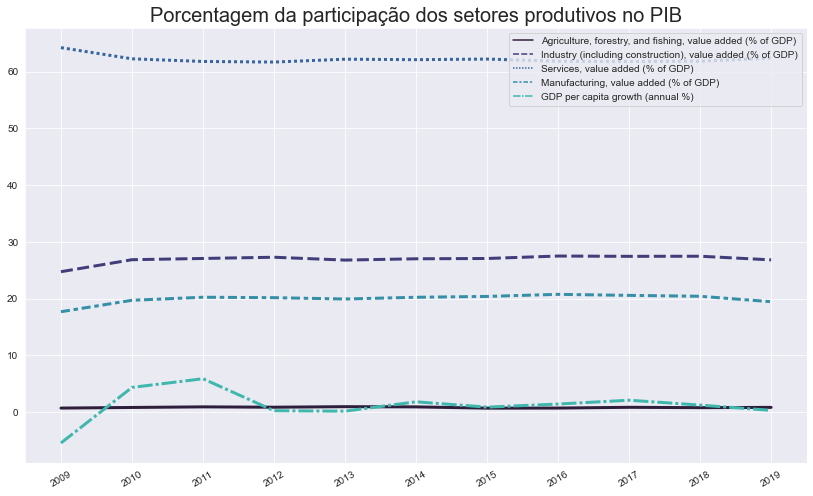

In [15]:
plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse[lista_percent_gdp + ['GDP per capita growth (annual %)']],
                     linewidth=3,
                     legend=True)

graph.set_title('Porcentagem da participação dos setores produtivos no PIB', fontsize=20)

plt.legend(loc='best')

plt.savefig('./../graficos/setores_produtivos_percent_gdp.png')

plt.show()

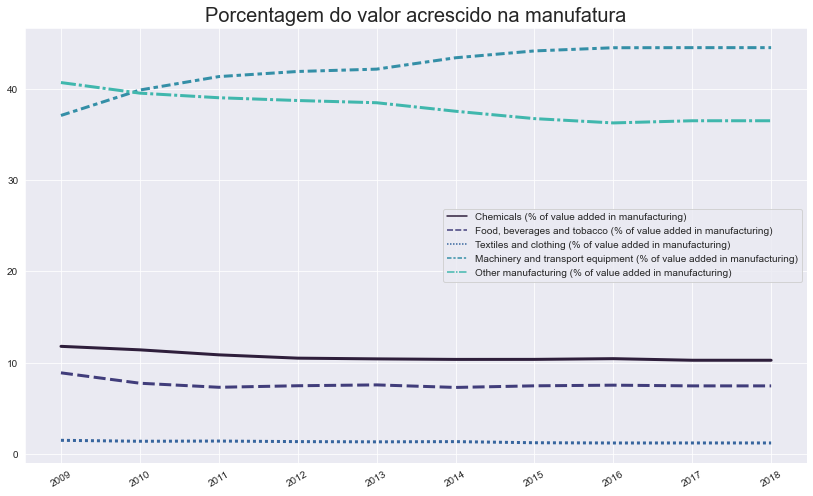

In [16]:
plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse[lista_value_added].drop(['GDP per person employed (constant 2017 PPP $)','GDP per capita growth (annual %)'], axis=1),
                     linewidth=3,
                     legend=True)

graph.set_title('Porcentagem do valor acrescido na manufatura', fontsize=20)

plt.legend(loc='best')

plt.savefig('./../graficos/valor_acrescido_manufatura.png')

plt.show()

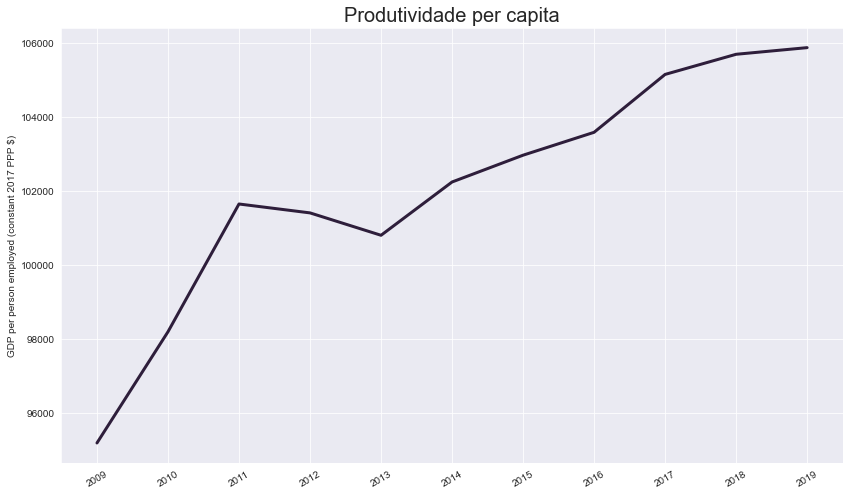

In [17]:
plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse['GDP per person employed (constant 2017 PPP $)'],
                     linewidth=3,
                     legend=True)

graph.set_title('Produtividade per capita', fontsize=20)

plt.savefig('./../graficos/produtividade_.png')

plt.show()

# 4 - Inflacao e desemprego

In [18]:
df_interesse[colunas_interesse_4]

Series Name,"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
2009,0.312738,7.742
2010,1.103809,6.966
2011,2.075175,5.824
2012,2.008491,5.379
2013,1.504721,5.231
2014,0.906798,4.981
2015,0.514421,4.624
2016,0.491749,4.122
2017,1.509497,3.746
2018,1.732168,3.384


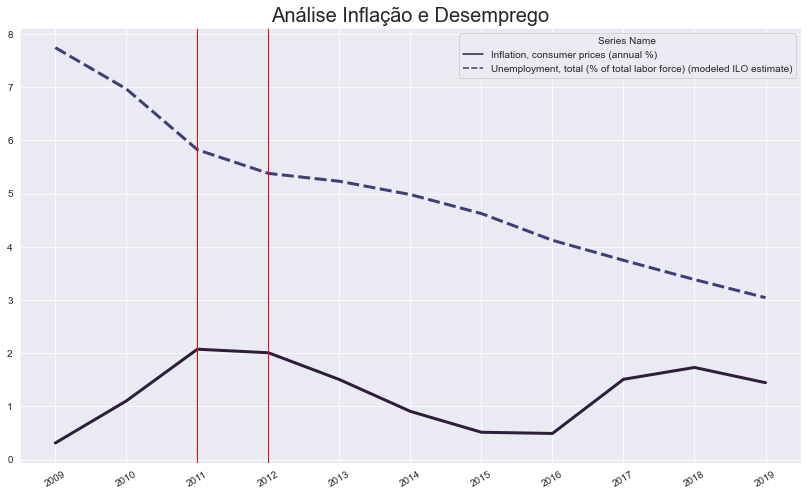

In [19]:
plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_interesse[colunas_interesse_4],
                     linewidth=3,
                     legend=True)
graph.axvline(2011, color = "r",linewidth=1)

graph.axvline(2012, color = "r",linewidth=1)


graph.set_title('Análise Inflação e Desemprego', fontsize=20)

plt.savefig('./../graficos/inflacao_desemprego.png')

plt.show()

In [20]:
df_interesse["year"] = df_interesse.index
df_interesse["size"] = 500

In [21]:
df_interesse

Series Name,"Population, total",GDP growth (annual %),"GNI, PPP (current international $)","GNI per capita, PPP (current international $)","Agriculture, forestry, and fishing, value added (% of GDP)",Chemicals (% of value added in manufacturing),"Industry (including construction), value added (% of GDP)","Services, value added (% of GDP)","Manufacturing, value added (% of GDP)","Food, beverages and tobacco (% of value added in manufacturing)",...,Other manufacturing (% of value added in manufacturing),GDP per capita growth (annual %),GDP per person employed (constant 2017 PPP $),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Revenue, excluding grants (% of GDP)",Expense (% of GDP),Net lending (+) / net borrowing (-) (% of GDP),year,size
2009,81902307.0,-5.697152,3.086257e+12,37680.0,0.695334,11.810820,24.735805,64.228553,17.683350,8.912990,...,40.673692,-5.457901,95185.714095,0.312738,7.742,28.787642,31.046068,-2.182171,2009,500
2010,81776930.0,4.178969,3.251502e+12,39760.0,0.803697,11.427787,26.848893,62.258657,19.695211,7.775234,...,39.514843,4.338692,98195.346832,1.103809,6.966,27.990446,31.366713,-3.262869,2010,500
2011,80274983.0,3.924133,3.502470e+12,43630.0,0.910022,10.881598,27.068972,61.794354,20.233000,7.331359,...,39.012966,5.868557,101653.222108,2.075175,5.824,28.322852,28.874983,-0.450222,2011,500
2012,80425823.0,0.419551,3.570904e+12,44400.0,0.847919,10.519067,27.283986,61.686731,20.156449,7.499457,...,38.708894,0.231213,101412.491027,2.008491,5.379,28.554444,28.493868,0.169671,2012,500
2013,80645605.0,0.428243,3.712582e+12,46040.0,0.942643,10.438919,26.782613,62.191794,19.925196,7.592197,...,38.465736,0.154548,100806.533180,1.504721,5.231,28.547815,28.546001,0.155726,2013,500
2014,80982500.0,2.225689,3.883390e+12,47950.0,0.904548,10.380739,27.010996,62.108573,20.224395,7.314861,...,37.534709,1.800420,102248.619637,0.906798,4.981,28.500289,28.052182,0.644866,2014,500
2015,81686611.0,1.739750,3.983766e+12,48770.0,0.683780,10.383827,27.064556,62.214074,20.377186,7.491085,...,36.728429,0.862788,102973.888156,0.514421,4.624,28.390961,27.909487,0.647246,2015,500
2016,82348669.0,2.230000,4.266416e+12,51810.0,0.698318,10.461927,27.496666,61.840528,20.743722,7.562144,...,36.256892,1.408102,103593.274397,0.491749,4.122,28.352637,27.861683,0.705561,2016,500
2017,82657002.0,2.465030,4.493919e+12,54370.0,0.831436,10.288514,27.442149,61.783026,20.562128,7.484724,...,36.494318,2.082808,105159.868445,1.509497,3.746,28.688933,28.221011,0.587090,2017,500
2018,82905782.0,1.527446,4.641068e+12,55980.0,0.768635,10.288514,27.461734,61.840705,20.403634,7.484724,...,36.494319,1.222787,105704.688984,1.732168,3.384,29.059554,28.065675,1.074642,2018,500


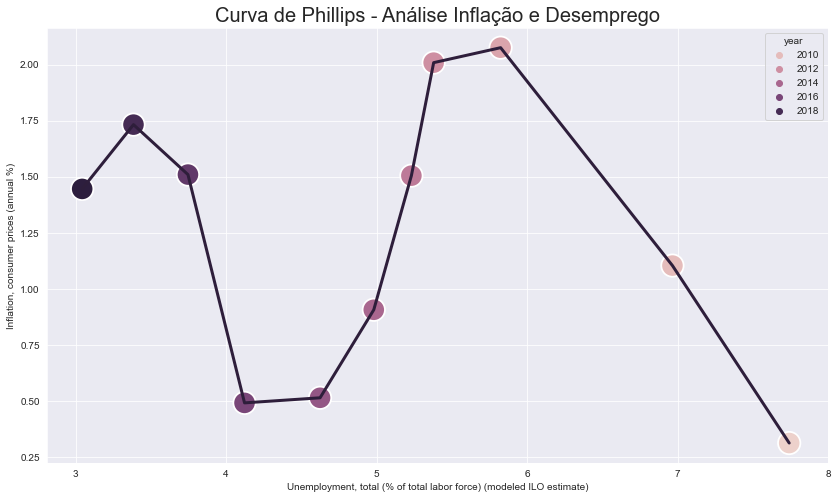

In [22]:
df_alemanha[colunas_interesse_4]

graph = sns.lineplot(x=df_interesse[colunas_interesse_4[1]],
                     y=df_interesse[colunas_interesse_4[0]],
                     linewidth=3,
                     legend=True)


g = sns.scatterplot(data=df_interesse[colunas_interesse_4 + ["year"]], 
                x=colunas_interesse_4[1], 
                y=colunas_interesse_4[0],
                s=500,
                hue="year",
                legend= True)

plt.xticks([8,7,6,5,4,3])

graph.set_title('Curva de Phillips - Análise Inflação e Desemprego', fontsize=20)

plt.savefig('./../graficos/phillips_anos_interesse.png')

plt.show()

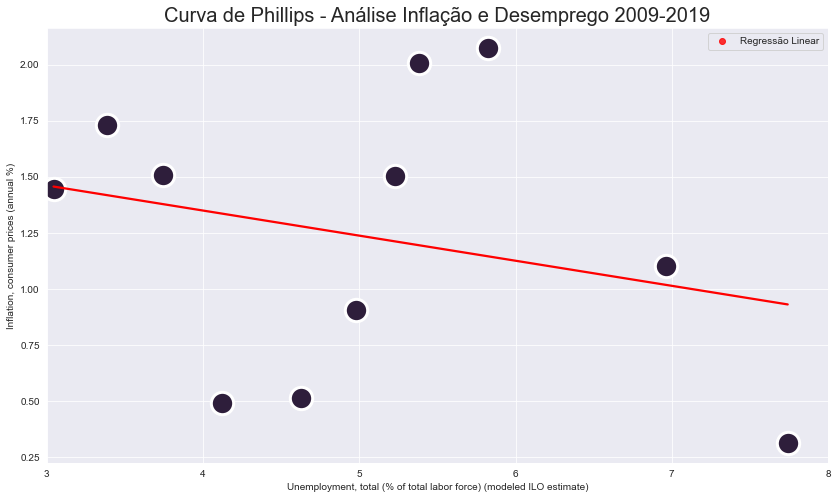

In [23]:
X_ = df_interesse[colunas_interesse_4[1]].values.astype(float).reshape(-1, 1)
y_ = df_interesse[colunas_interesse_4[0]].values.astype(float).reshape(-1, 1)

ax2 =sns.regplot(x=X_, 
            y=y_,
            order=1,
            color="red",
            ci=None,
            label="Regressão Linear")

graph = sns.scatterplot(x=df_interesse[colunas_interesse_4[1]],
                     y=df_interesse[colunas_interesse_4[0]],
                     linewidth=3,
                     s=500,
                     legend=True)

plt.xticks([8,7,6,5,4,3])

graph.set_title('Curva de Phillips - Análise Inflação e Desemprego 2009-2019', fontsize=20)

plt.savefig('./../graficos/phillips_09_19.png')

plt.show()

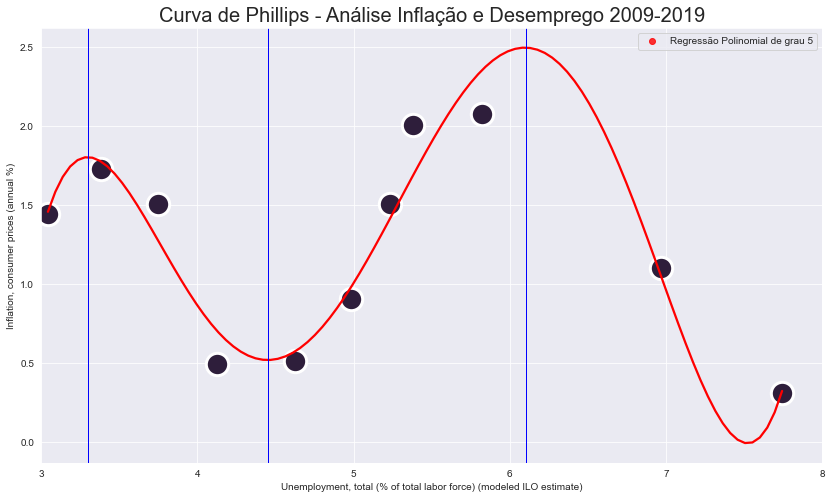

In [24]:
X_ = df_interesse[colunas_interesse_4[1]].values.astype(float).reshape(-1, 1)
y_ = df_interesse[colunas_interesse_4[0]].values.astype(float).reshape(-1, 1)


ax2 =sns.regplot(x=X_, 
            y=y_,
            order=5,
            color="red",
            ci=None,
            label="Regressão Polinomial de grau 5")

graph = sns.scatterplot(x=df_interesse[colunas_interesse_4[1]],
                     y=df_interesse[colunas_interesse_4[0]],
                     linewidth=3,
                     s=500,
                     legend=True)

graph.axvline(3.3, color = "b",linewidth=1)

graph.axvline(4.45, color = "b",linewidth=1)

graph.axvline(6.1, color = "b",linewidth=1)

plt.xticks([8,7,6,5,4,3])

graph.set_title('Curva de Phillips - Análise Inflação e Desemprego 2009-2019', fontsize=20)

plt.savefig('./../graficos/phillips_polinomial_09_19.png')

plt.show()

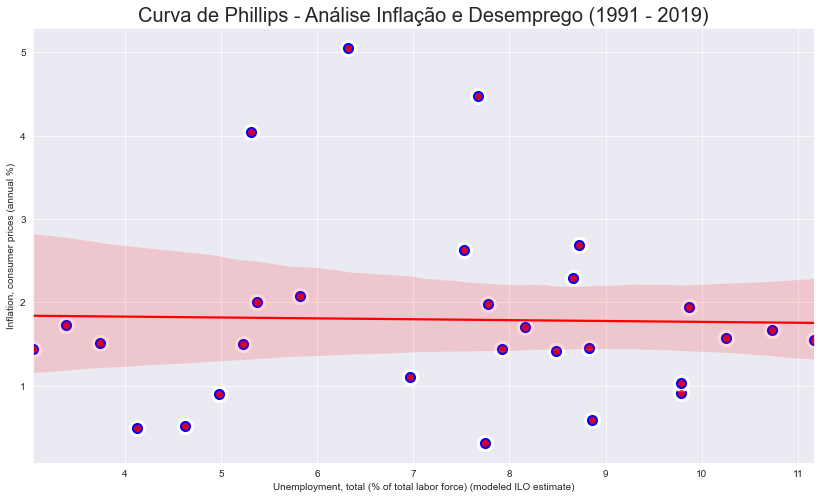

In [25]:
df_alemanha["year"] = df_alemanha.index

X_ = df_alemanha[colunas_interesse_4[1]][:-1].values.astype(float).reshape(-1, 1)
y_ = df_alemanha[colunas_interesse_4[0]][:-1].values.astype(float).reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(X_, y_)

pred = reg.predict(np.array([3,4,5,6,7,8,9,10,11]).reshape(-1,1))


graph = sns.scatterplot(x=df_alemanha[colunas_interesse_4[1]][:-1].astype(float),
                     y=df_alemanha[colunas_interesse_4[0]][:-1].astype(float),
                     linewidth=3,s=200,
                     color="blue",
                     legend=True)

ax2 =sns.regplot(x=X_, 
            y=y_,
            order=1,
            color="red",
            label=True)


graph.set_title('Curva de Phillips - Análise Inflação e Desemprego (1991 - 2019)', fontsize=20)

plt.savefig('./../graficos/phillips_91-19.png')

plt.show()

### PIB x desemprego e PIB x Inflacao

Text(0.5, 1.0, 'Crescimento percentual real do PIB por ano')

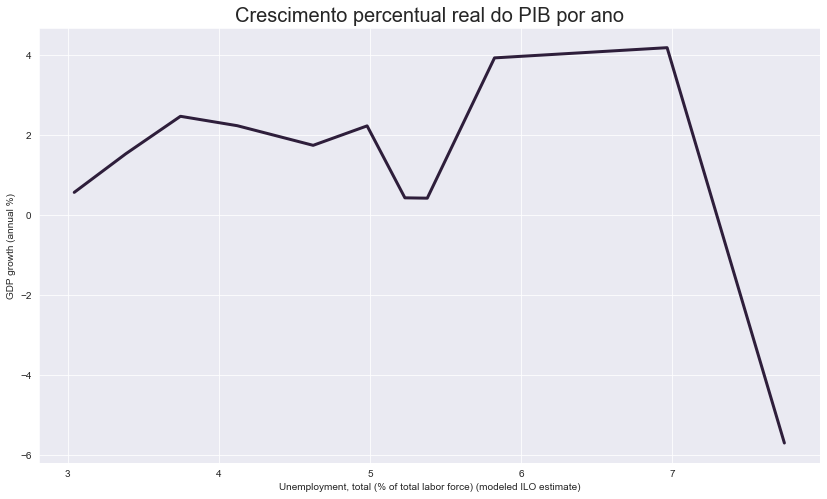

In [26]:
graph1 = sns.lineplot(data=df_interesse,
                     x= colunas_interesse_4[1],
                     y="GDP growth (annual %)", 
                     linewidth=3)

#graph1.axhline(0, color = "r",linewidth=1)

graph1.set_title('Crescimento percentual real do PIB por ano', fontsize=20)

Text(0.5, 1.0, 'Crescimento percentual real do PIB por ano')

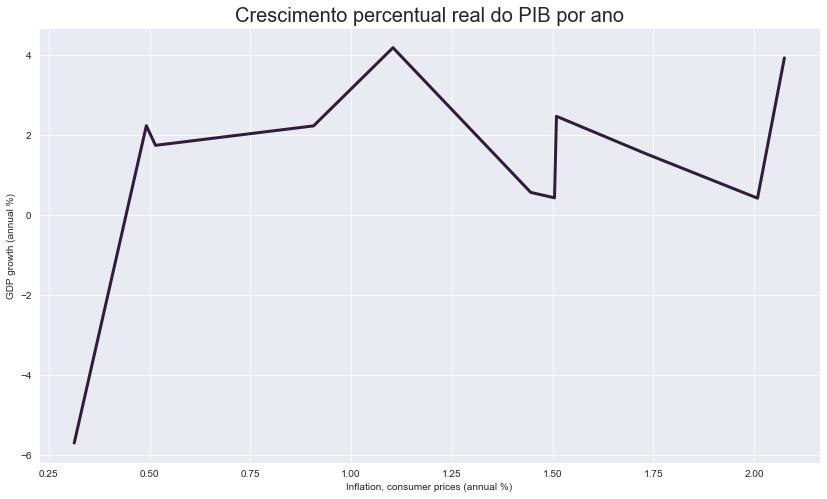

In [27]:
graph1 = sns.lineplot(data=df_interesse,
                     x= colunas_interesse_4[0],
                     y="GDP growth (annual %)", 
                     linewidth=3)

#graph1.axhline(0, color = "r",linewidth=1)

graph1.set_title('Crescimento percentual real do PIB por ano', fontsize=20)

In [28]:
dfs = pd.read_html("https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Wanderungen/Tabellen/wanderungen-alle.html")

tabela_migracao = dfs[0]
tabela_migracao.head(2)
anos = [int(ano[0][:4]) for ano in tabela_migracao["Jahr"].values[:-1]]
tabela_migracao["ano"] = anos + [0]

In [29]:
tabela_migracao["Insgesamt"].head(2)

,Zu­gezo­gene,Fort­gezogene,Saldo
0,1 188 033,979 447,208 586
1,1 558 612,1 231 552,327 060


In [30]:
tabela_selecionada = pd.DataFrame(tabela_migracao["Insgesamt"]["Zu­gezo­gene"][:-1])
tabela_selecionada["ano"] = tabela_migracao["ano"].values[:-1]
tabela_selecionada.columns = ["total_imigrantes","ano"]

total_imigrantes = [float(unidecode.unidecode(imigrantes).replace(" ","")) 
                    for imigrantes in tabela_selecionada["total_imigrantes"].values]

tabela_selecionada["total_imigrantes"] = total_imigrantes


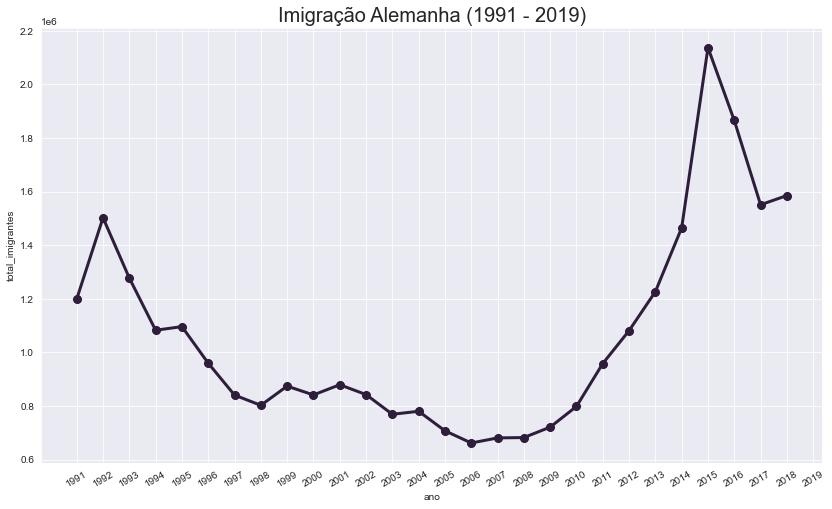

In [31]:
plt.xticks(tabela_selecionada["ano"].values,rotation=30)

g = sns.scatterplot(data=tabela_selecionada.iloc[2:], 
                x="ano", 
                y="total_imigrantes",
                s=100,
                legend= True)

g2 = sns.lineplot(data = tabela_selecionada.iloc[2:],
                  x="ano",
                  y="total_imigrantes",
                  linewidth=3,
                  legend=True)

g.set_title('Imigração Alemanha (1991 - 2019)', fontsize=20)

plt.savefig('./../graficos/imigracao.png')

plt.show()

# Apêndice

In [32]:
df = pd.read_excel("./../dados/Dados taxa básica ECB.xlsx" )

In [33]:
df.head(2)

,Year,Date,Fixed rate tenders Fixed rate,Variable rate tenders Minimum bid rate
0,2019,18 Sep.,0.00,-
1,2016,16 Mar.,0.00,-


In [34]:
conversion = {"Jan.":1,
              "Feb.":2,
              "Mar.":3,
              "Apr.":4,
              "May.":5,
              "Jun.":6,
              "Jul.":7,
              "Aug.":8,
              "Sep.":9,
              "Oct.":10,
              "Nov.":11,
              "Dec.":12}

days = []
months = []

for date in df["Date"]:
    days.append(int(date[:2]))
    months.append(conversion[date[-4:]])
    

In [35]:
df["Day"] = days
df["Month"] = months

### A tender procedure, in which the interest rate is specified in advance by the central bank and in which participating counterparties bid the amount of money they want to transact at that interest rate.

In [36]:
df

,Year,Date,Fixed rate tenders Fixed rate,Variable rate tenders Minimum bid rate,Day,Month
0,2019,18 Sep.,0.00,-,18,9
1,2016,16 Mar.,0.00,-,16,3
2,2015,9 Dec.,0.05,-,9,12
3,2014,10 Sep.,0.05,-,10,9
4,2014,11 Jun.,0.15,-,11,6
5,2013,13 Nov.,0.25,-,13,11
6,2013,8 May.,0.50,-,8,5
7,2012,11 Jul.,0.75,-,11,7
8,2011,14 Dec.,1.00,-,14,12
9,2011,9 Nov.,1.25,-,9,11


In [37]:
df["Full Date"] = pd.to_datetime(df[["Year","Month","Day"]])
df.drop(["Date","Day","Month"], axis=1, inplace=True)
df = df[["Year","Full Date", "Fixed rate tenders Fixed rate","Variable rate tenders Minimum bid rate"]]
df.replace("-", np.NaN, inplace = True)

In [38]:
df_interesse_ap = df.loc[df["Full Date"]>np.datetime64("2009-01-01")]

In [39]:
df_interesse_ap["Fixed rate tenders Fixed rate"] = df_interesse_ap["Fixed rate tenders Fixed rate"].astype(float)

<ipython-input-39-c3c40d86daa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesse_ap["Fixed rate tenders Fixed rate"] = df_interesse_ap["Fixed rate tenders Fixed rate"].astype(float)


In [40]:
df_interesse_ap_agregado = df_interesse_ap.drop(["Full Date",
                                                 "Variable rate tenders Minimum bid rate"], 
                                                axis=1).groupby(by="Year").mean()

In [41]:
df_interesse_ap.head(2)

,Year,Full Date,Fixed rate tenders Fixed rate,Variable rate tenders Minimum bid rate
0,2019,2019-09-18,0.0,NaN
1,2016,2016-03-16,0.0,NaN


In [42]:
df_interesse_ap_agregado

,Fixed rate tenders Fixed rate
Year,
2009,1.4375
2011,1.2500
2012,0.7500
2013,0.3750
2014,0.1000
2015,0.0500
2016,0.0000
2019,0.0000


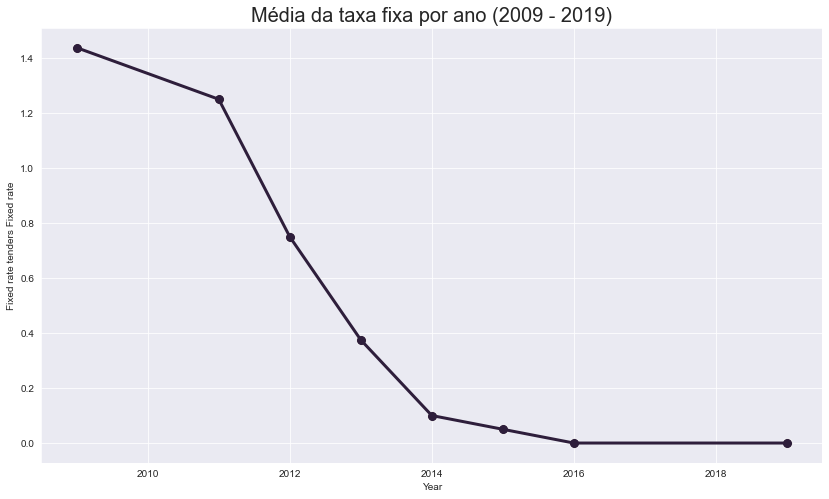

In [43]:
#plt.xticks(df_interesse_agregado["Year"].values,rotation=30)

g = sns.scatterplot(data=df_interesse_ap_agregado, 
                x="Year", 
                y="Fixed rate tenders Fixed rate",
                s=100,
                legend= True)

g2 = sns.lineplot(data = df_interesse_ap_agregado,
                  x="Year",
                  y="Fixed rate tenders Fixed rate",
                  linewidth=3,
                  legend=True)

g.set_title('Média da taxa fixa por ano (2009 - 2019)', fontsize=20)

plt.savefig('./../graficos/taxa_fixa_agregado.png')

plt.show()

In [44]:
df_inf = pd.DataFrame(df_interesse[colunas_interesse_4[0]])
df_inf["Year"] = df_inf.index
df_inf["Month"] = 1
df_inf["Day"] = 1
df_inf["Full Date"] = pd.to_datetime(df_inf[["Year","Month","Day"]])

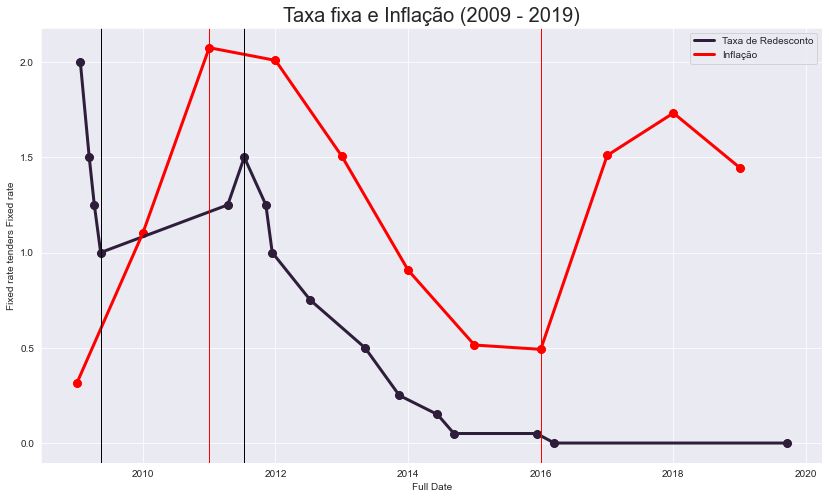

In [45]:
g = sns.scatterplot(data=df_interesse_ap, 
                x="Full Date", 
                y="Fixed rate tenders Fixed rate",
                s=100)

g2 = sns.lineplot(data = df_interesse_ap,
                  x="Full Date",
                  y="Fixed rate tenders Fixed rate",
                  linewidth=3,
                  label="Taxa de Redesconto")

g3 = sns.lineplot(data = df_inf,
                  x="Full Date",
                  y=colunas_interesse_4[0],
                  linewidth=3,
                  label="Inflação",
                  color="red")

g4 = sns.scatterplot(data = df_inf,
                  x="Full Date",
                  y=colunas_interesse_4[0],
                  s=100,
                  color="red")

g.axvline(np.datetime64("2009-05-13"), color = "black",linewidth=1)
g.axvline(np.datetime64("2011-07-13"), color = "black",linewidth=1)

g.axvline(np.datetime64("2011-01-01"), color = "red",linewidth=1)
g.axvline(np.datetime64("2016-01-01"), color = "red",linewidth=1)

plt.legend()

g.set_title('Taxa fixa e Inflação (2009 - 2019)', fontsize=20)

plt.savefig('./../graficos/taxa_fixa_inflacao_redesconto.png')

plt.show()

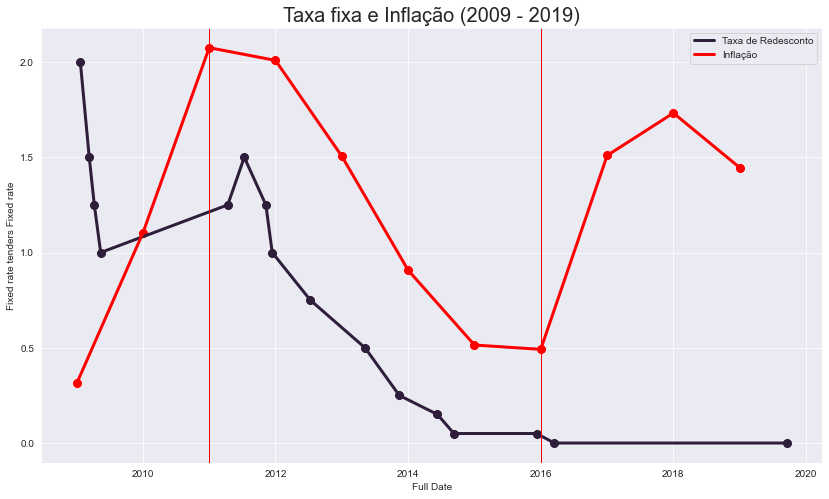

In [46]:
g = sns.scatterplot(data=df_interesse_ap, 
                x="Full Date", 
                y="Fixed rate tenders Fixed rate",
                s=100)

g2 = sns.lineplot(data = df_interesse_ap,
                  x="Full Date",
                  y="Fixed rate tenders Fixed rate",
                  linewidth=3,
                  label="Taxa de Redesconto")

g3 = sns.lineplot(data = df_inf,
                  x="Full Date",
                  y=colunas_interesse_4[0],
                  linewidth=3,
                  label="Inflação",
                  color="red")

g4 = sns.scatterplot(data = df_inf,
                  x="Full Date",
                  y=colunas_interesse_4[0],
                  s=100,
                  color="red")

g.axvline(np.datetime64("2011-01-01"), color = "red",linewidth=1)
g.axvline(np.datetime64("2016-01-01"), color = "red",linewidth=1)

plt.legend()

g.set_title('Taxa fixa e Inflação (2009 - 2019)', fontsize=20)

plt.savefig('./../graficos/taxa_fixa_inflacao_inflacao.png')

plt.show()

In [47]:
df_interesse_ap_tot = df.loc[df["Full Date"]>=np.datetime64("2008-10-15")]

df_interesse_ap_tot

,Year,Full Date,Fixed rate tenders Fixed rate,Variable rate tenders Minimum bid rate
0,2019,2019-09-18,0.00,NaN
1,2016,2016-03-16,0.00,NaN
2,2015,2015-12-09,0.05,NaN
3,2014,2014-09-10,0.05,NaN
4,2014,2014-06-11,0.15,NaN
5,2013,2013-11-13,0.25,NaN
6,2013,2013-05-08,0.50,NaN
7,2012,2012-07-11,0.75,NaN
8,2011,2011-12-14,1.00,NaN
9,2011,2011-11-09,1.25,NaN


In [48]:

df_interesse_2008 = pd.DataFrame(df_alemanha[colunas_interesse_4[0]].iloc[-13:-1:])
df_interesse_2008["Year"] = list(df_interesse_2008.index)
df_interesse_2008.reset_index(drop=True)



df_interesse_2008["Month"] = 1
df_interesse_2008["Day"] = 1
df_interesse_2008["Full Date"] = pd.to_datetime(df_interesse_2008[["Year","Month","Day"]])

In [49]:
df_interesse_2008 = pd.DataFrame(df_interesse_2008)

In [50]:
df_interesse_2008["Inflation, consumer prices (annual %)"] = df_interesse_2008["Inflation, consumer prices (annual %)"].astype(float)

In [51]:
df_interesse_ap_tot[::-1]

,Year,Full Date,Fixed rate tenders Fixed rate,Variable rate tenders Minimum bid rate
18,2008,2008-10-15,3.75,NaN
17,2008,2008-11-12,3.25,NaN
16,2008,2008-12-10,2.50,NaN
15,2009,2009-01-21,2.00,NaN
14,2009,2009-03-11,1.50,NaN
13,2009,2009-04-08,1.25,NaN
12,2009,2009-05-13,1.00,NaN
11,2011,2011-04-13,1.25,NaN
10,2011,2011-07-13,1.50,NaN
9,2011,2011-11-09,1.25,NaN


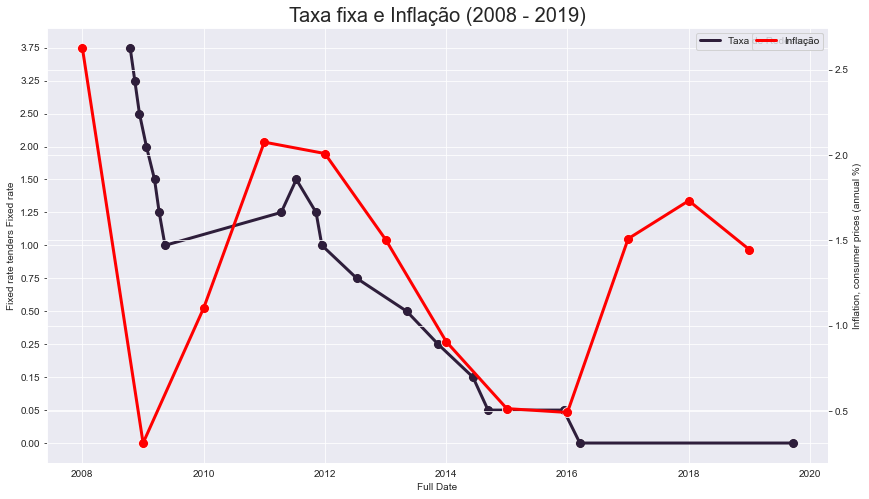

In [52]:
g = sns.scatterplot(data=df_interesse_ap_tot[::-1], 
                x="Full Date", 
                y="Fixed rate tenders Fixed rate",
                s=100)


sns.lineplot(data = df_interesse_ap_tot[::-1],
                  x="Full Date",
                  y="Fixed rate tenders Fixed rate",
                  linewidth=3,
                  label="Taxa de Redesconto")


ax = g.twinx()


g2 = sns.lineplot(data = df_interesse_2008,
                  x="Full Date",
                  y=colunas_interesse_4[0],
                  linewidth=3,
                  label="Inflação",
                  color="red")


sns.scatterplot(data = df_interesse_2008,
                  x="Full Date",
                  y=colunas_interesse_4[0],
                  s=100,
                  color="red")


#g.axvline(np.datetime64("2011-01-01"), color = "red",linewidth=1)
#g.axvline(np.datetime64("2016-01-01"), color = "red",linewidth=1)

plt.legend()

g.set_title('Taxa fixa e Inflação (2008 - 2019)', fontsize=20)

plt.savefig('./../graficos/taxa_fixa_2008.png')

plt.show()

In [53]:
df_interesse[colunas_interesse_5 + ["year"]][:-1]

Series Name,"Revenue, excluding grants (% of GDP)",Expense (% of GDP),Net lending (+) / net borrowing (-) (% of GDP),year
2009,28.787642,31.046068,-2.182171,2009
2010,27.990446,31.366713,-3.262869,2010
2011,28.322852,28.874983,-0.450222,2011
2012,28.554444,28.493868,0.169671,2012
2013,28.547815,28.546001,0.155726,2013
2014,28.500289,28.052182,0.644866,2014
2015,28.390961,27.909487,0.647246,2015
2016,28.352637,27.861683,0.705561,2016
2017,28.688933,28.221011,0.587090,2017
2018,29.059554,28.065675,1.074642,2018


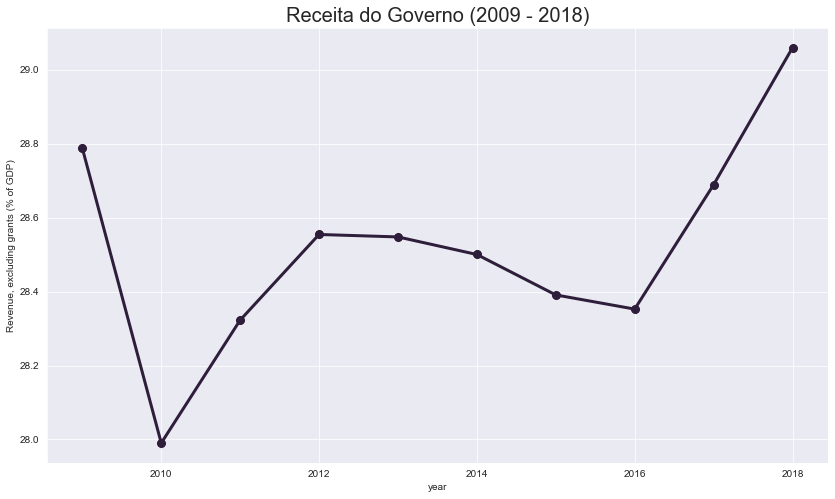

In [54]:
#plt.xticks(df_interesse_agregado["Year"].values,rotation=30)

g = sns.scatterplot(data=df_interesse[colunas_interesse_5 + ["year"]][:-1], 
                x="year", 
                y=colunas_interesse_5[0],
                s=100,
                legend= True)

g2 = sns.lineplot(data = df_interesse[colunas_interesse_5 + ["year"]][:-1],
                  x="year",
                  y=colunas_interesse_5[0],
                  linewidth=3,
                  legend=True)

g.set_title('Receita do Governo (2009 - 2018)', fontsize=20)

plt.savefig('./../graficos/receita_governo.png')

plt.show()

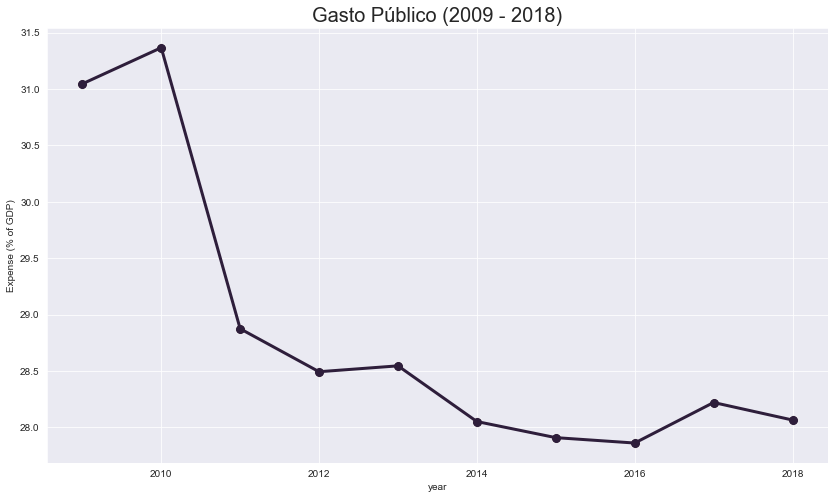

In [55]:
g = sns.scatterplot(data=df_interesse[colunas_interesse_5 + ["year"]][:-1], 
                x="year", 
                y=colunas_interesse_5[1],
                s=100,
                legend= True)

g2 = sns.lineplot(data = df_interesse[colunas_interesse_5 + ["year"]][:-1],
                  x="year",
                  y=colunas_interesse_5[1],
                  linewidth=3,
                  legend=True)

g.set_title('Gasto Público (2009 - 2018)', fontsize=20)

plt.savefig('./../graficos/gasto_publico.png')

plt.show()

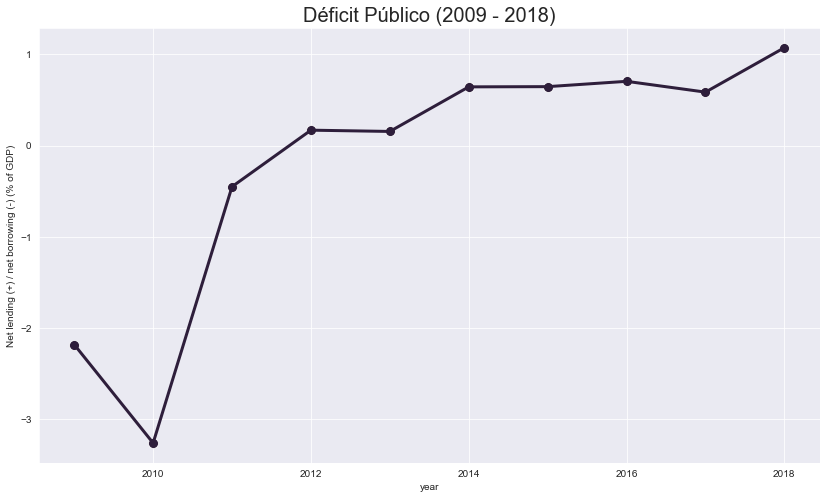

In [56]:
g = sns.scatterplot(data=df_interesse[colunas_interesse_5 + ["year"]][:-1], 
                x="year", 
                y=colunas_interesse_5[2],
                s=100,
                legend= True)

g2 = sns.lineplot(data = df_interesse[colunas_interesse_5 + ["year"]][:-1],
                  x="year",
                  y=colunas_interesse_5[2],
                  linewidth=3,
                  legend=True)

g.set_title('Déficit Público (2009 - 2018)', fontsize=20)

plt.savefig('./../graficos/deficit_publico.png')

plt.show()

# Referencias

https://www.wsj.com/amp/articles/germany-and-the-phillips-curve-1512036200

https://www.bruegel.org/2017/11/german-wages-the-phillips-curve-and-migration-in-the-euro-area/?utm_content=bufferd517f&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer+(bruegel)

https://www.research.unicredit.eu/DocsKey/economics_docs_2018_163800.ashx?EXT=pdf&KEY=C814QI31EjqIm_1zIJDBJD6JY42wEMwkUmJ3oGwc2IY=&T=1